# Activity 7

This activity tests your skills in formulating and solving systems of linear algebraic equations,
as well as analyzing the results thereof.

## Imports

Put all your imports in the following cell.

In [1]:
import math as mt

import numpy as np

## Scenario

Referring to [this diagram](./act-07.png),
you are to analyze an ideal truss
with anticipated loads $P_{\text{v}}$ and $P_{\text{h}}$,
and supported by a pin at $C$ and a roller at $A$.
In particular, you are to determine the following:
- the horizontal component of the reactive force developed in the pin,
- the vertical component of the reactive force developed in the pin,
- the vertical component of the reactive force developed in the roller,
- the force developed in member $AB$,
- the force developed in member $AD$,
- the force developed in member $BD$,
- the force developed in member $CD$, and
- the force developed in member $BC$.

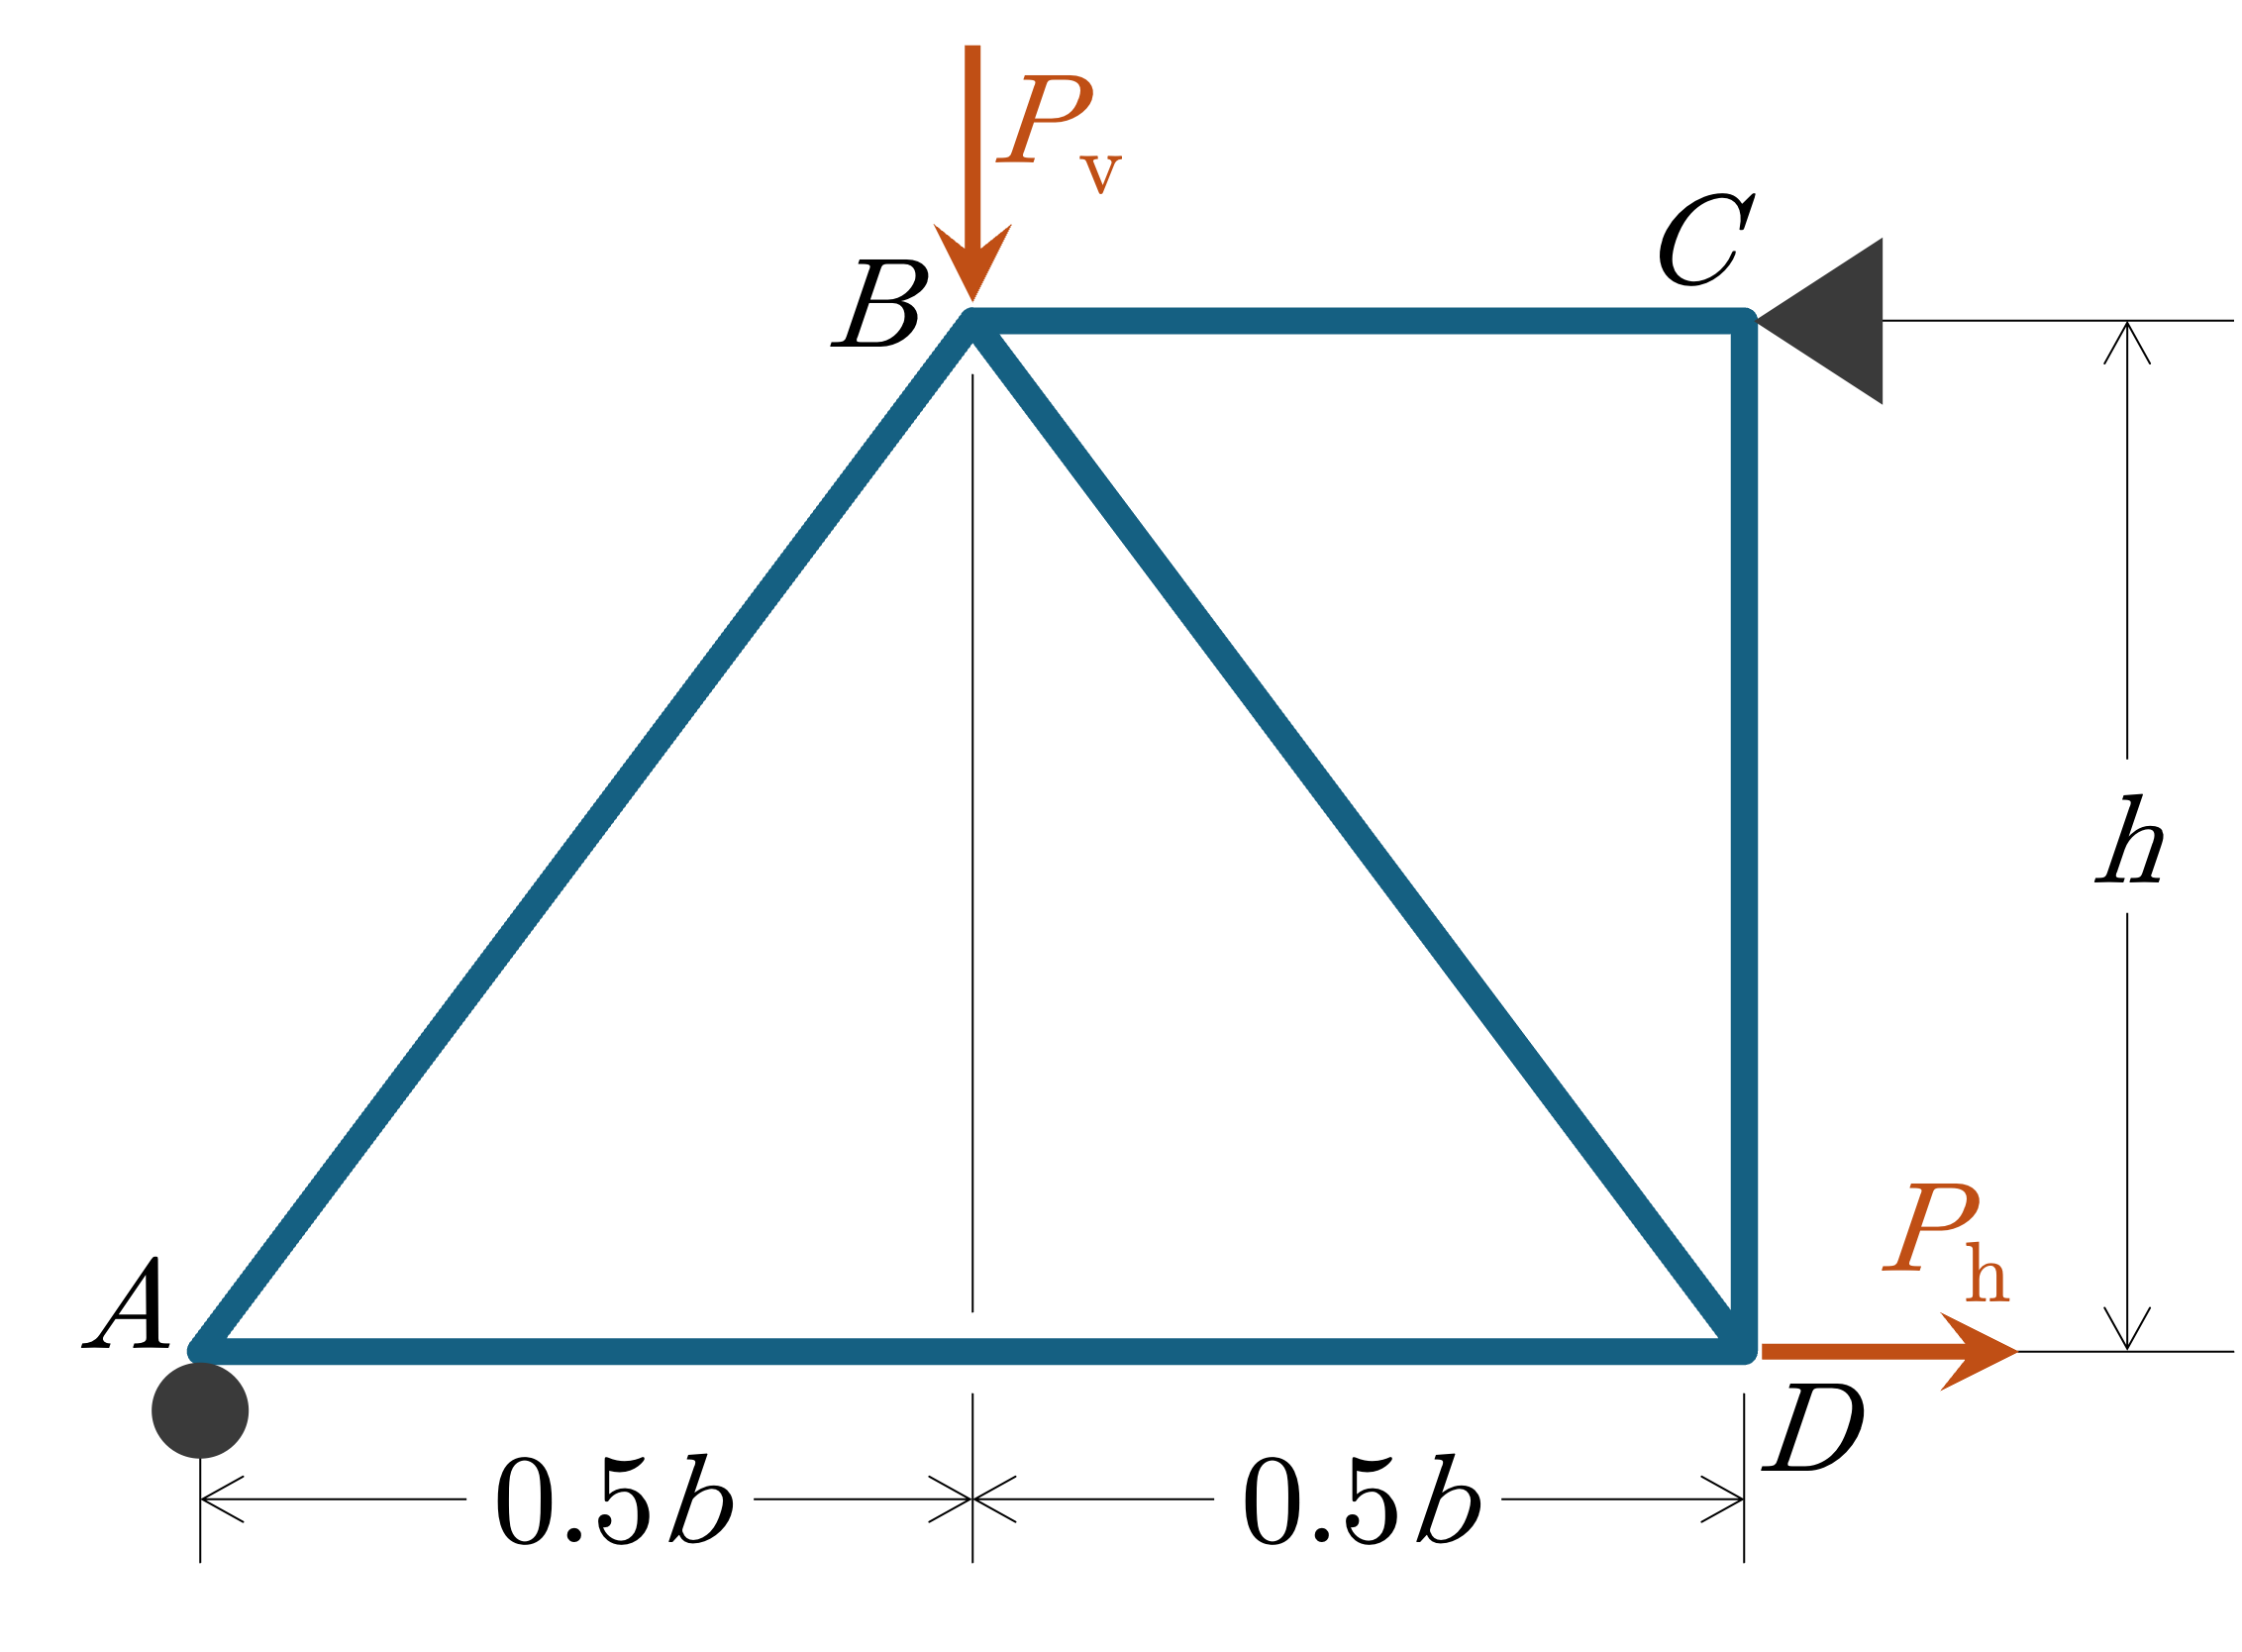

## Modelling

Derive a system of eight (8) linear algebraic equations
in terms of the said eight desired quantities.
Arrange the equations in the matrix-vector form
$\boldsymbol{A} \boldsymbol{x} = \boldsymbol{b}$,
where $\boldsymbol{x}$ contains the unknowns
in the order presented above.

Define two Python functions, `get_coeffs()` and `get_rhs()`.

`get_coeffs()` takes two positional arguments in the following order:

- `b`, representing the dimension $b$, and
- `h`, representing the dimension $h$,

and returns a NumPy array representing the coefficient matrix $\boldsymbol{A}$.

On the other hand,
`get_rhs()` takes two positional arguments in the following order:

- `Pv`, representing $P_{\text{v}}$, and
- `Ph`, representing $P_{\text{h}}$,

and returns a NumPy array representing the right-hand-side vector $\boldsymbol{b}$.

In [2]:
def get_coeffs(b,h):
    adj = 0.5*b #Horizontal leg (Adjacent side)
    opp = h #Vertical leg (Opposite side)
    hyp = np.sqrt(adj**2 + opp**2) #Hypotenuse

    c = adj / hyp #Cosine
    s = opp / hyp #Sine

    coeffs = np.array([
        [0, 0, 0, c, 1, 0, 0, 0], #Summation of Forces (x-axis) at joint A
        [0, 0, 1, s, 0, 0, 0, 0], #Summation of Forces (y-axis) at joint A
        [0, 0, 0, -c, 0, c, 0, 1], #Summation of Forces (x-axis) at joint B
        [0, 0, 0, -s,  0, -s,  0,  0], #Summation of Forces (y-axis) at joint B
        [1, 0, 0,  0,  0,  0,  0, -1], #Summation of Forces (x-axis) at joint C
        [0, 1, 0,  0,  0,  0, -1,  0], #Summation of Forces (y-axis) at joint C
        [0, 0, 0,  0, -1, -c,  0,  0], #Summation of Forces (x-axis) at joint D
        [0, 0, 0,  0,  0,  s,  1,  0]  #Summation of Forces (x-axis) at joint D
    ])
    return coeffs

def get_rhs(Pv, Ph):
    rhs = np.array([0, 0, 0, Pv, 0, 0, -Ph, 0])
    return rhs

## Assessment

Define Python variables
`b`, `h`, `Pv`, and `Ph`
for storing the parameters
$b$, $h$, $P_{\text{v}}$, and $P_{\text{h}}$,
respectively.

Use `get_coeffs()` and `get_rhs()`
to generate the coefficient matrix and the right-hand-side vector,
respectively storing them in Python variables
`coeffs` and `rhs`.

Use [`numpy.linalg.solve()`](https://numpy.org/doc/2.3/reference/generated/numpy.linalg.solve.html)
to solve for $\boldsymbol{x}$,
storing it to a Python variable `vars`.

In [3]:
#Define b, h, Pv, Ph (Test Values) 
b = 6 
h = 4 
Pv = 400 
Ph = 600

coeffs = get_coeffs(b, h) 
rhs = get_rhs(Pv, Ph) 

print("Coefficient Matrix:") 
print(coeffs) 
print("Right-hand Side Vector:") 
print(rhs)

Coefficient Matrix:
[[ 0.   0.   0.   0.6  1.   0.   0.   0. ]
 [ 0.   0.   1.   0.8  0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.6  0.   0.6  0.   1. ]
 [ 0.   0.   0.  -0.8  0.  -0.8  0.   0. ]
 [ 1.   0.   0.   0.   0.   0.   0.  -1. ]
 [ 0.   1.   0.   0.   0.   0.  -1.   0. ]
 [ 0.   0.   0.   0.  -1.  -0.6  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.8  1.   0. ]]
Right-hand Side Vector:
[   0    0    0  400    0    0 -600    0]


In [4]:
vars = np.linalg.solve(coeffs, rhs)

print("Solution Vector:") 
print(vars)

Solution Vector:
[-600. -200.  600. -750.  450.  250. -200. -600.]


In [5]:
print("Values of Unknown Variables:")
print("Horizontal force of pin is:", vars[0],"N")
print("Vertical force of pin is:", vars[1],"N")
print("Vertical force of roller is:", vars[2],"N")
print("Force Member AB is:", vars[3],"N")
print("Force Member AD is:", vars[4],"N")
print("Force Member BD is:", vars[5],"N")
print("Force Member CD is:", vars[6],"N")
print("Force Member BC is:", vars[7],"N")

Values of Unknown Variables:
Horizontal force of pin is: -600.0 N
Vertical force of pin is: -200.0 N
Vertical force of roller is: 600.0 N
Force Member AB is: -750.0 N
Force Member AD is: 450.0 N
Force Member BD is: 249.99999999999997 N
Force Member CD is: -200.0 N
Force Member BC is: -600.0 N


## Submission instructions

Download this notebook file,
and save with a filename following the pattern
`ACT-07_<Group name>`,
where the group name is as listed in class.
For example, if you belong to the group Bulay-og,
then your notebook should be named `ACT-07_Bulay-og.ipynb`.
Submit your notebook via the classwork platform for this activity in Google Classroom.
Submissions beyond the deadline will not be considered.

Lastly, the use of AI tools to answer this exam is not prohibited,
but it is of ethical interest to disclose such use.
This is in line with the
[MSU Policy on the Fair and Ethical Use of AI and Its Applications](https://www.msumain.edu.ph/wp-content/uploads/2024/05/MSU-Policy-on-Ethical-use-of-AI-Policies.pdf).
As such, please include a brief statement (in a private comment to this classwork)
declaring which and how AI tools are used in your work.

*Last updated by Christian Cahig on 2025-11-20*